In [1]:
from scipy import special as sy # need special functions for incomplete \\ 
## elliptic integrals of the first kind

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font = { "family" : "normal",
        "weight" : "normal",
        "size" : 20}
matplotlib.rc("font", **font)        

When its convenient, we will also adopt an oop style, using classes to define objects. For example, we can create a class for black hole objects as follows:

In [3]:
class point_bh:
    def __init__(self,M):
        self.M=M
 #defining the metric.
    def A(self,r):
        return(1.0-2.0*self.M/r)
    def B(self,r):
        return (self.A(r)**(-1))
    def C(self,r):
        return(r**2)
 #
    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)
 # functions concurring to the deflection angle calculation
    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))
    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)
    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))
 # the deflection angle
    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) # using the ellipkinc function
 # from scipy.special
        return(-np.pi+4.0*np.sqrt(r/s)*F)


In [4]:
class point_mass:
    def __init__(self,M):
        self.M=M
 # the classical formula
    def defAngle(self,u):
        return(4.0*self.M/u)

In [5]:
bh=point_bh(3.0)
pm=point_mass(3.0)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

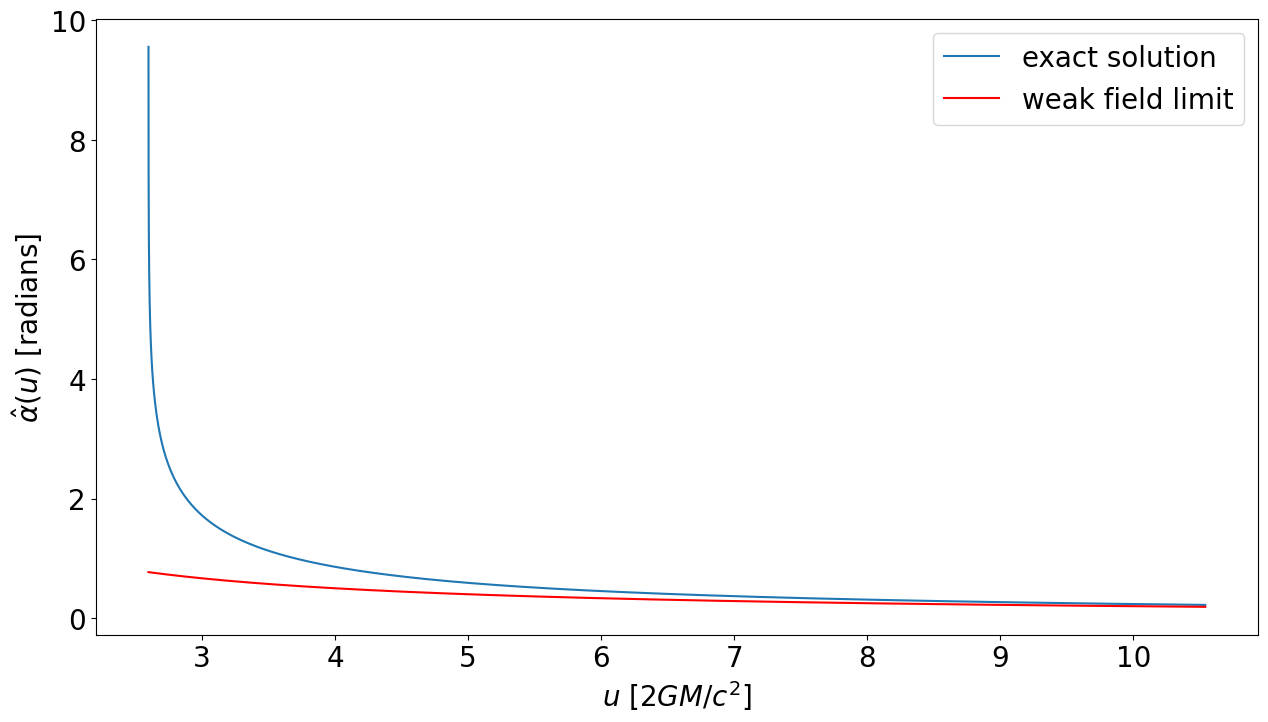

In [6]:
r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M
u=bh.u(r)/2.0/bh.M

a=bh.defAngle(r)
b=pm.defAngle(u*2.0*bh.M)

# initialize figure and axes
# (single plot, 15" by 8" in size)
fig,ax=plt.subplots(1,1,figsize=(15,8))
# plot the exact solution in ax
ax.plot(u,a,"-",label="exact solution")
# plot the solution in the weak field limit
ax.plot(u,b,"-",label="weak field limit",color="red")
# set the labels for the x and the y axes
ax.set_xlabel(r"$u$ $[2GM/c^2]$")
ax.set_ylabel(r"$\hat\alpha(u)$ [radians]")
# add the legend
ax.legend()

In [7]:
# plot a vertical dotted line at u=3\sqrt(3)/2
x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,":")

In [8]:
# save figure in png format
fig.savefig("bhalpha.png")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

 bhalpha.png --> Deflection angle by a compact lens as a function of the photon impact parameter. Shown
 are the exact solution of the geodesic equations for a Schwarzschild metric (solid line) and the
 solution in the weak field approximation (dashed line). The dotted vertical line shows the impact
 parameter, u = 3√3GM/c2, for which the exact solution diverges, indicating that the photon
 keeps looping around the lens
